<a href="https://colab.research.google.com/github/Lordelva/INVERSIONPUBLICIDAD/blob/main/Reto_Inversi%C3%B3nPublicidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


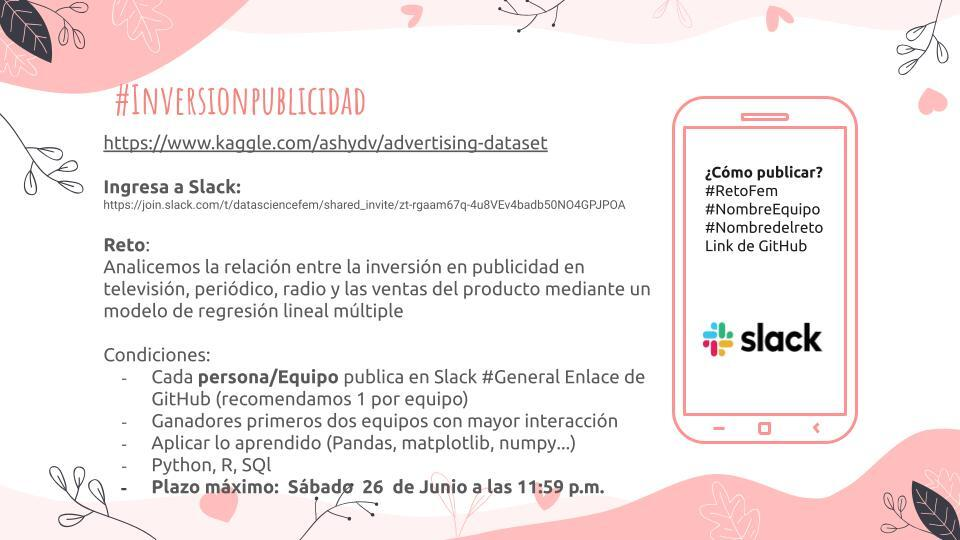

In [5]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/DataFem/Reto.jpeg', width=900)

In [24]:
#importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
import plotly.express as px

**Aclaraciones**

Ventas en miles de unidades

Las inversiones están dadas en miles de dólares

In [8]:
# Importar data
publicidad = pd.read_csv("/content/drive/MyDrive/DataFem/advertising.csv")

In [9]:
# Vizualizar dataframe
publicidad.sample(5)

,TV,Radio,Newspaper,Sales
150,280.7,13.9,37.0,16.1
74,213.4,24.6,13.1,17.0
21,237.4,5.1,23.5,17.5
44,25.1,25.7,43.3,8.5
124,229.5,32.3,74.2,19.7


In [10]:
# Resumen información data
publicidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


**ANÁLISIS ESTADÍSTICO**

In [ ]:
# Descriptivas data
publicidad.describe()

Podemos ver que hay mayor promedio de inversión en publicidad en el medio de televisión ( $147.04).

**ANÁLISIS GRÁFICO**

In [30]:
# Lista con los nombres de las variables
col = list(publicidad.columns[:-1])
col

['TV', 'Radio', 'Newspaper']

In [ ]:
# Scatter plot
figure,axis = plt.subplots(1,3,figsize=(15,5))
for i in col:
  idx=col.index(i)
  custom_palette = ['#DECBE4','#0000FF','#FFFFCC']
  g=sns.scatterplot(ax=axis[idx],data=publicidad, x=i, y="Sales",hue=idx)
  sns.set_palette(custom_palette)

g.figure.suptitle('Relación entre las variables de entrada VS Ventas', size=20)



Text(0.5, 1.0, 'Correlación entre inversión en publicidad y ventas')

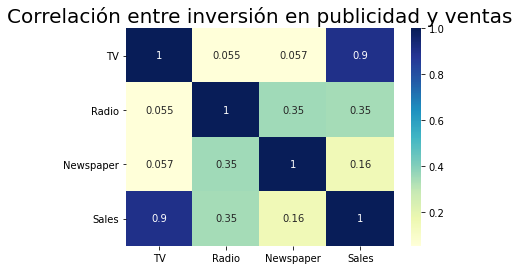

In [28]:
# Análisis de correlación
sns.heatmap(publicidad.corr(),cmap='YlGnBu',annot=True)
plt.title('Correlación entre inversión en publicidad y ventas', fontsize = 20)

Se evidencia que existe una alta correlación entre la inversión en TV y las ventas

**ANÁLISIS DE PREDICCIÓN**

Modelo: RLM

In [13]:
# División test - train
cols = publicidad.columns.values
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(publicidad[cols[:-1]],publicidad['Sales'],train_size=0.7,random_state=42)

In [14]:
Xtrain

,TV,Radio,Newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [15]:
# ENTRENAMIENTO
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(Xtrain, ytrain)

print('Intercepto: \n', regr.intercept_)
print('Coeficientes: \n', regr.coef_)

Intercepto: 
 4.743766701589683
Coeficientes: 
 [0.05358869 0.10270677 0.00793167]


In [16]:
# prediction with sklearn
y_predic= regr.predict(Xtest)

In [45]:
# Gráfico de relación
fig = px.scatter(x=ytest, y=y_predic)
fig.show()

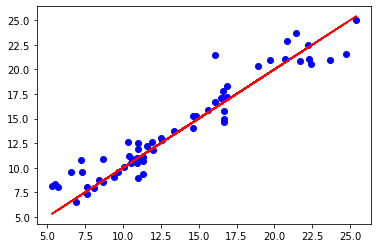

In [49]:
plt.scatter(ytest, y_predic, color='blue')
plt.plot(ytest, ytest, color='red')
plt.show()

(array([ 7.,  6., 15.,  5.,  4., 11.,  1.,  3.,  5.,  3.]),
 array([ 5.3 ,  7.31,  9.32, 11.33, 13.34, 15.35, 17.36, 19.37, 21.38,
        23.39, 25.4 ]),
 <a list of 10 Patch objects>)

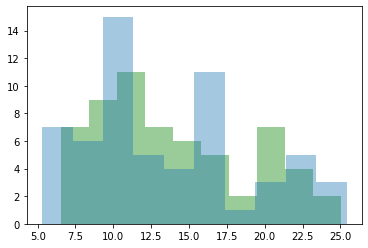

In [26]:
plt.hist(y_predic,alpha=0.4,color='green')
plt.hist(ytest,alpha=0.4)

In [22]:
# with statsmodels
X = sm.add_constant(Xtrain) # adding a constant
 
model = sm.OLS(ytrain, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     374.3
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           1.69e-65
Time:                        00:38:23   Log-Likelihood:                -271.70
No. Observations:                 140   AIC:                             551.4
Df Residuals:                     136   BIC:                             563.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7438      0.400     11.863      0.0

In [31]:
# Mirando el modelo anterior y basadas en que el coeficiente no es significativo, probamos una nueva especificación solo incluyendo como variable explicativa la inversión de publicidad en TV y Radio para ver si mejora el R2
# with sklearn
regr.fit(Xtrain[["TV","Radio"]], ytrain)

print('Intercepto: \n', regr.intercept_)
print('Coeficientes: \n', regr.coef_)

Intercepto: 
 4.892050035638782
Coeficientes: 
 [0.05360953 0.10653078]


In [32]:
# with statsmodels
X = sm.add_constant(Xtrain[["TV","Radio"]]) # adding a constant
 
model = sm.OLS(ytrain, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     560.3
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           1.11e-66
Time:                        01:03:15   Log-Likelihood:                -272.28
No. Observations:                 140   AIC:                             550.6
Df Residuals:                     137   BIC:                             559.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8921      0.375     13.046      0.0

**CONCLUSIONES**

1. Existe una correlación lineal positiva de 0.9 entre la inversión en publicidad en la TV y las ventas.
2. No le agrega valor al modelo la variable Newspaper, ya que no es significativa a ningún nivel de significancia
3. Al probar eliminar la variable del modelo, observamos que no existe una mejora en el modelo, especificamente cuando comparamos los R2-adjustados.